In [62]:
import numpy as np
import matplotlib.pyplot as plt

data.shape = (427, 640, 3)


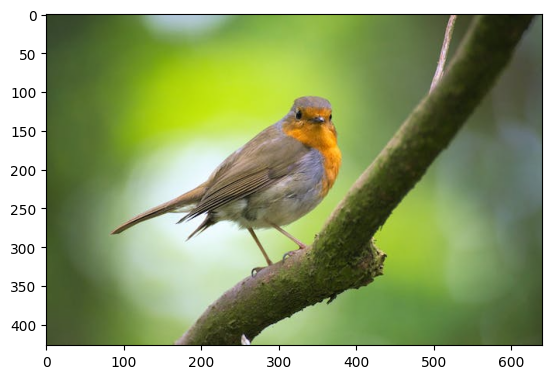

In [63]:
data = plt.imread('./Lab1.5_image.png')

# 3rd dimension has 4 elements, where 4th is an alpha channel (always 255) - it can be removed
if data.shape[2] == 4:
    data = data[:, :, :3]

print(f"data.shape = {data.shape}")

plt.imshow(data)

Transform to 2d

In [64]:
data_reshaped = np.reshape(data, (data.shape[0] * data.shape[1], 3))
data_reshaped.shape

(273280, 3)

In [65]:
def generate_random_centroids(data, k_means = 3):

    random_location = [int(idx) for idx in np.random.rand(k_means)*data.shape[0]]
    random_centroids = data[random_location]

    return random_centroids


def kmeans(data, k_means, max_tries = 3, max_depth=1000, error = 10):

    # list of losses per iteration
    iteration_loss = {}

    # j times running k-means
    for j in range(max_tries):

        interim_centroid = generate_random_centroids(data, k_means)

        #data row to cluster assignment
        assignments = np.array([])

        loss = []

        # i times - max steps to find optimal centroid
        for i in range(max_depth):

            idx_loss = 0
            assignment = []
            
            for point in data:

                distances = np.sum((point - interim_centroid)**2, axis=1)
                min_distance = np.argmin(distances)
                assignment.append(min_distance)
                idx_loss += np.sum((interim_centroid[min_distance] - point)**2, axis=0)

            if i > 0 and abs(idx_loss - loss[-1]) < error :
                break

            loss.append(idx_loss)

            assignments = np.array(assignment)

            # adjust centroids to new location (mean of all assignment)

            for idx in range(len(interim_centroid)):
                mean = data[assignments==idx]
                new_centroid = np.mean(mean, axis=0)
                interim_centroid[idx] = new_centroid

        iteration_loss[j] = [loss[-1], interim_centroid, assignments]

    return iteration_loss

In [66]:
result = kmeans(data_reshaped, k_means=16)

In [67]:
all_losses = [val[0] for val in result.values()]
best_result = result[np.argmin(all_losses)]
best_result

[1651.0232103786211,
 array([[0.70490384, 0.8494857 , 0.09399163],
        [0.59507257, 0.73833305, 0.3017263 ],
        [0.34633437, 0.37758368, 0.27001366],
        [0.42575985, 0.46851075, 0.37867832],
        [0.24499421, 0.27365798, 0.1323375 ],
        [0.7698451 , 0.5011477 , 0.13011885],
        [0.48906562, 0.6497271 , 0.15973555],
        [0.8841574 , 0.95217603, 0.919635  ],
        [0.43985605, 0.5734943 , 0.2969182 ],
        [0.3680246 , 0.47308195, 0.21810973],
        [0.5438255 , 0.6031878 , 0.4256865 ],
        [0.14834066, 0.16642599, 0.05818831],
        [0.29461387, 0.36903235, 0.18303388],
        [0.6587413 , 0.7271463 , 0.5332095 ],
        [0.7477751 , 0.87133116, 0.3183529 ],
        [0.7789733 , 0.8614518 , 0.7271848 ]], dtype=float32),
 array([4, 4, 4, ..., 4, 4, 4])]

In [68]:
assignments = best_result[2]
centroids = best_result[1]

# Answer

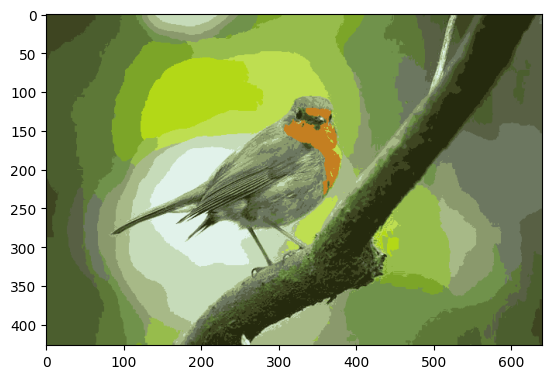

In [69]:
result_image = centroids[assignments].reshape(427, 640, 3)
plt.imshow(result_image)